In [3]:
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.core.display import display, HTML


In [4]:
from tensorflow.keras.utils import pad_sequences


In [5]:
def tune_rhc(problem, restart_list):
    
    random_seeds = np.arange(10, 15).tolist()
    best_avg = -1 * (2 ** 31)
    best_results = {"decay_rate": 0}
    
    for r in restart_list:
        
        total_fit = 0
        for seed in random_seeds:
            best_state, best_fitness, curve = mlrose_hiive.random_hill_climb(problem, restarts=r, random_state=seed)
            total_fit += best_fitness
        
        avg_fit = total_fit / len(random_seeds)
        if avg_fit > best_avg:
            best_results = {"restarts": r, "fit": avg_fit}
            best_avg = avg_fit
            
    return best_results
    
def tune_sa(problem, decay_rates):
    random_seeds = np.arange(10, 15).tolist()
    best_avg = -1 * (2 ** 31)
    best_results = {"decay_rate": 0}
    
    for d in decay_rates:
        schedule = mlrose_hiive.GeomDecay(init_temp=1.0, decay=d, min_temp=.001)
        total_fit = 0
        for seed in random_seeds:
            best_state, best_fitness, curve = mlrose_hiive.simulated_annealing(problem, schedule=schedule, random_state=seed)
            total_fit += best_fitness
        
        avg_fit = total_fit / len(random_seeds)
        if avg_fit > best_avg:
            best_results = {"decay_rate": d, "fit": avg_fit}
            best_avg = avg_fit
            
    return best_results

def tune_ga(problem, pop_size_list, mut_prob_list):
    
    random_seeds = np.arange(10, 15).tolist()
    best_avg = -1 * (2 ** 31)
    best_results = {"pop_size": 0, "mutation_prob": 0}
    
    for p in pop_size_list:
        for m in mut_prob_list:
        
            total_fit = 0
            for seed in random_seeds:
                best_state, best_fitness, curve = mlrose_hiive.genetic_alg(problem, pop_size=p, mutation_prob=m, random_state=seed)
                total_fit += best_fitness
        
            avg_fit = total_fit / len(random_seeds)
            if avg_fit > best_avg:
                best_results = {"pop_size": p, "mutation_prob": m, "fit": avg_fit}
                best_avg = avg_fit
            
    return best_results
    
        
def tune_mimic(problem, keep_pct_list, pop_size_list, noise_list):
    random_seeds = np.arange(10, 15).tolist()
    
    best_avg = -1 * (2 ** 31)
    best_results = {"keep_pct": 0, "pop_size": 0}
    
    for k in keep_pct_list:
        for p in pop_size_list:
            for n in noise_list:
                total_fit = 0
            
                for seed in random_seeds:
                    best_state, best_fitness, curve = mlrose_hiive.mimic(problem, keep_pct=k, pop_size=p, random_state=seed, noise=n, curve=True)
                    total_fit += best_fitness
                
                avg_fit = total_fit / len(random_seeds)
                if avg_fit > best_avg:
                    best_results = {"keep_pct": k, "pop_size": p, "noise": n, "fit": avg_fit}
                    best_avg = avg_fit
    
    return best_results

In [258]:
weights = np.random.randint(1, 10, size=10)
values = np.random.randint(1, 8, size=10)

max_weight_pct = .75
fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct)

In [ ]:
# Cover: Fitness / Iteration: Since we're dealing with optimization problems, those problems will present access to a fitness score at each iteration.
# Fitness / Problem Size: Focusing on a single problem size can misrepresent how well an algorithm is actually doing. To counteract this, try multiple problem sizes.
# Function Evaluations: There's many ways to interpret fevals. Some students will focus on fevals / wall clock times, or fevals / iterations, etc. The real requirement is that you somehow look at fevals. Keep in mind that some algorithms may take significantly less iterations but each iteration may take significantly longer.
# Wall Clock Time: Our favorite. Look into it.

In [259]:
problem = mlrose_hiive.DiscreteOpt(10, fitness, maximize=True, max_val=2)

In [120]:
mlrose_hiive.random_hill_climb(problem, max_attempts=10, restarts=3, init_state = None, curve=True, random_state=None)

(array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1]),
 26.0,
 array([[20.,  1.],
        [20.,  2.],
        [26.,  4.],
        [26.,  5.],
        [26.,  6.],
        [26.,  7.],
        [26.,  8.],
        [26.,  9.],
        [26., 10.],
        [26., 11.],
        [26., 12.],
        [26., 13.],
        [26., 14.]]))

In [260]:
#simulated annealing?
start = time.time()
best_state, best_fitness, curve = mlrose_hiive.simulated_annealing(problem, curve=True)
end = time.time()
print("Time: ", end - start)
print(best_fitness)

Time:  0.0021419525146484375
25.0


In [269]:
start = time.time()
best_state, best_fitness, curve = mlrose_hiive.mimic(problem, max_attempts=1, keep_pct=.1, curve=True)
end = time.time()
print("Time: ", end - start)
print(best_fitness)

Time:  0.05036497116088867
28.0


In [266]:
#simulated annealing?
start = time.time()
best_state, best_fitness, curve = mlrose_hiive.genetic_alg(problem, max_attempts=1, curve=True)
end = time.time()
print("Time: ", end - start)
print(best_fitness)

Time:  0.0339360237121582
28.0


In [ ]:
#knapsack highlights advantages of genetic algorithms

## Knapsack Problem

In [29]:
from mlrose_hiive.generators import KnapsackGenerator

In [111]:
mimic_fit['pop_size']

150

In [109]:
problem = KnapsackGenerator().generate(seed=1, number_of_items_types=30)

In [112]:
keep_pct_list=[.1, .15, .2, .25]
noise_list = [0.0, .025, 0.05]
pop_size_list=[100, 150, 200]
decay_rates = [.9, .95, .99, .999]
mutation_probs = [.1, .15, .2, .25, .3]
restart_list = [5, 20, 50]

mimic_fit = tune_mimic(problem, keep_pct_list, pop_size_list, noise_list)
sa_fit = tune_sa(problem, decay_rates)
ga_fit = tune_ga(problem, pop_size_list, mutation_probs)
rhc_fit = tune_rhc(problem, restart_list)

In [113]:
problem_sizes = [10, 20, 30, 40, 50]


random_seeds = np.arange(0, 5).tolist()

mimic_scores = []
sa_scores = []
ga_scores = []
rhc_scores = []

for p in problem_sizes:
    
    problem = KnapsackGenerator().generate(seed=1, number_of_items_types=p)
    
    mimic_seed_scores = []
    sa_seed_scores = []
    ga_seed_scores = []
    rhc_seed_scores = []
    
    for r in random_seeds:
    
        
    
    
        _, fitness, _ = mlrose_hiive.mimic(problem, keep_pct=mimic_fit['keep_pct'], pop_size = mimic_fit['pop_size'], noise=mimic_fit['noise'])
        mimic_seed_scores.append(fitness)
        _, fitness, _ = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(init_temp=1.0, decay=sa_fit['decay_rate'], min_temp=.001))
        sa_seed_scores.append(fitness)
        _, fitness, _ = mlrose_hiive.genetic_alg(problem, pop_size=ga_fit['pop_size'], mutation_prob=ga_fit['mutation_prob'])
        ga_seed_scores.append(fitness)
        _, fitness, _ = mlrose_hiive.random_hill_climb(problem, restarts=rhc_fit['restarts'])
        rhc_seed_scores.append(fitness)
    mimic_scores.append(mimic_seed_scores)
    sa_scores.append(sa_seed_scores)
    ga_scores.append(ga_seed_scores)
    rhc_scores.append(rhc_seed_scores)

In [114]:
mimic_scores, sa_scores, ga_scores, rhc_scores = np.array(mimic_scores), np.array(sa_scores), np.array(ga_scores), np.array(rhc_scores)

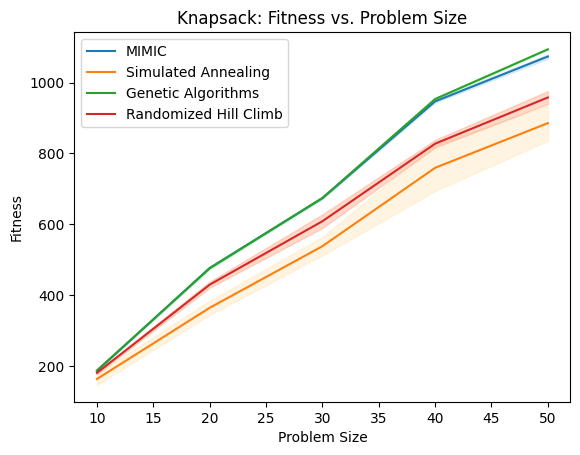

In [115]:
plt.plot(problem_sizes, np.mean(mimic_scores, axis=1), label="MIMIC")
plt.fill_between(problem_sizes, np.mean(mimic_scores, axis=1) + np.std(mimic_scores, axis=1), np.mean(mimic_scores, axis=1) - np.std(mimic_scores, axis=1), color='lightblue', alpha=.4)
plt.plot(problem_sizes, np.mean(sa_scores, axis=1), label="Simulated Annealing")
plt.fill_between(problem_sizes, np.mean(sa_scores, axis=1) + np.std(sa_scores, axis=1), np.mean(sa_scores, axis=1) - np.std(sa_scores, axis=1), color='moccasin', alpha=.4)

plt.plot(problem_sizes, np.mean(ga_scores, axis=1), label ="Genetic Algorithms")
plt.fill_between(problem_sizes, np.mean(ga_scores, axis=1) + np.std(ga_scores, axis=1), np.mean(ga_scores, axis=1) - np.std(ga_scores, axis=1), color='palegreen', alpha=.4)

plt.plot(problem_sizes, np.mean(rhc_scores, axis=1), label="Randomized Hill Climb")
plt.fill_between(problem_sizes, np.mean(rhc_scores, axis=1) + np.std(rhc_scores, axis=1), np.mean(rhc_scores, axis=1) - np.std(rhc_scores, axis=1), color='lightsalmon', alpha=.4)

plt.title("Knapsack: Fitness vs. Problem Size")
plt.xlabel("Problem Size")
plt.ylabel("Fitness")
plt.legend()
plt.savefig("Knapsack_problem_size.png")

In [116]:
problem = KnapsackGenerator().generate(seed=1, number_of_items_types=40)
mimic_curves = []
sa_curves = []
ga_curves = []
rhc_curves = []

random_seeds = np.arange(0, 5).tolist()

for r in random_seeds: 

    _, _, mimic_curve = mlrose_hiive.mimic(problem, keep_pct=mimic_fit['keep_pct'], pop_size=mimic_fit['pop_size'], random_state=r, curve=True, noise=mimic_fit['noise'])
    _, _, sa_curve = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(init_temp=1.0, decay=sa_fit['decay_rate'], min_temp=.001), random_state=r, curve=True)
    _, _, ga_curve = mlrose_hiive.genetic_alg(problem, pop_size=ga_fit['pop_size'], mutation_prob=ga_fit['mutation_prob'], random_state=r, curve=True)
    _, _, rhc_curve = mlrose_hiive.random_hill_climb(problem, restarts=rhc_fit['restarts'], random_state=r, curve=True)
    
    mimic_curves.append(mimic_curve)
    sa_curves.append(sa_curve)
    ga_curves.append(ga_curve)
    rhc_curves.append(rhc_curve)

In [117]:
mimic_curves = pad_sequences(mimic_curves, dtype="float64", padding="post", value=np.nan)
sa_curves = pad_sequences(sa_curves, dtype="float64", padding="post", value=np.nan)
ga_curves = pad_sequences(ga_curves, dtype="float64", padding="post", value=np.nan)
rhc_curves = pad_sequences(rhc_curves, dtype="float64", padding="post", value=np.nan)

mimic_stats = np.array([np.nanmean(mimic_curves[:, :, 0], axis=0), np.nanstd(mimic_curves[:,:,0], axis=0)])
sa_stats = np.array([np.nanmean(sa_curves[:,:,0], axis=0), np.nanstd(sa_curves[:,:,0], axis=0)])
ga_stats = np.array([np.nanmean(ga_curves[:,:,0], axis=0), np.nanstd(ga_curves[:,:,0], axis=0)])
rhc_stats = np.array([np.nanmean(rhc_curves[:,:,0], axis=0), np.nanstd(rhc_curves[:,:,0], axis=0)])

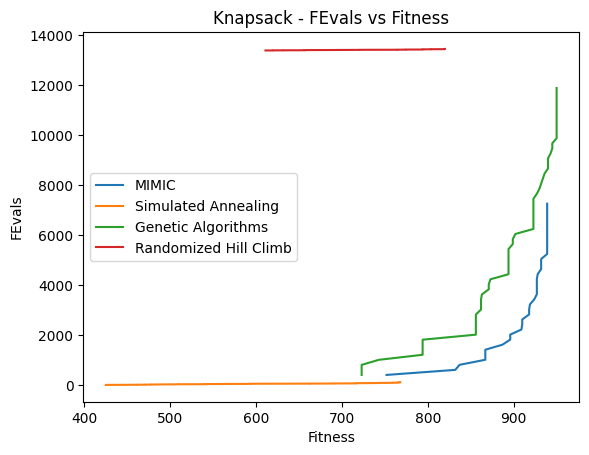

In [118]:
plt.plot(mimic_curve[:, 0], mimic_curve[:, 1], label="MIMIC")
plt.plot(sa_curve[:, 0], sa_curve[:, 1], label="Simulated Annealing")
plt.plot(ga_curve[:, 0], ga_curve[:, 1], label="Genetic Algorithms")
plt.plot(rhc_curve[:, 0], rhc_curve[:, 1], label="Randomized Hill Climb")
plt.xlabel("Fitness")
plt.ylabel("FEvals")
plt.legend()
plt.title("Knapsack - FEvals vs Fitness")
plt.savefig("Knapsack_FEvals_Fit.png")

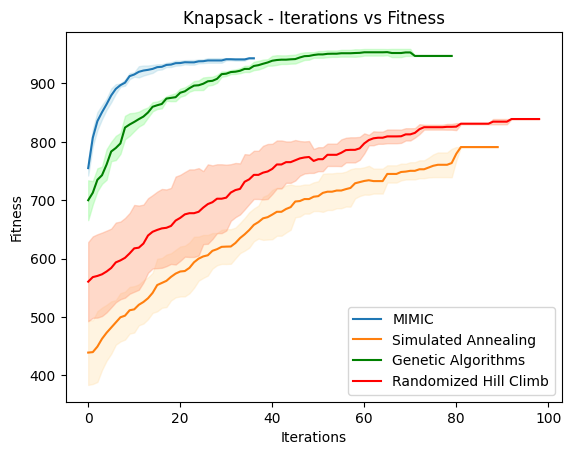

In [119]:
plt.plot(list(range(len(mimic_stats[0, :]))), mimic_stats[0, :], label="MIMIC")
plt.fill_between(list(range(len(mimic_stats[0, :]))), mimic_stats[0,:] + mimic_stats[1,:], mimic_stats[0,:] - mimic_stats[1,:], color='lightblue', alpha=.4)
plt.plot(list(range(len(sa_stats[0, :]))), sa_stats[0, :], label="Simulated Annealing")
plt.fill_between(list(range(len(sa_stats[0, :]))), sa_stats[0,:] + sa_stats[1,:], sa_stats[0,:] - sa_stats[1,:], color='moccasin', alpha=.4)

plt.plot(list(range(len(ga_stats[0, :]))), ga_stats[0, :], label="Genetic Algorithms",color='green')
plt.fill_between(list(range(len(ga_stats[0, :]))), ga_stats[0,:] + ga_stats[1,:], ga_stats[0,:] - ga_stats[1,:], color='palegreen', alpha=.4)

plt.plot(list(range(len(rhc_stats[0, :]))), rhc_stats[0, :], label="Randomized Hill Climb",color='red')
plt.fill_between(list(range(len(rhc_stats[0, :]))), rhc_stats[0,:] + rhc_stats[1,:], rhc_stats[0,:] - rhc_stats[1,:], color='lightsalmon', alpha=.4)

plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend()
plt.title("Knapsack - Iterations vs Fitness")
plt.savefig("Knapsack_Iterations_Fit.png")

In [95]:
problem_sizes = [10, 20, 30, 40, 50]
mimic_times = []
sa_times = []
ga_times = []
rhc_times = []

for p in problem_sizes:
    problem = KnapsackGenerator().generate(seed=1, number_of_items_types=p)
    
    start = time.time()
    mlrose_hiive.mimic(problem, keep_pct=mimic_fit['keep_pct'], pop_size=mimic_fit['pop_size'], random_state=1, noise=mimic_fit['noise'], curve=True)
    end = time.time()
    runtime = end - start
    mimic_times.append(runtime)
    
    start = time.time()
    mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(init_temp=1.0, decay=sa_fit['decay_rate'], min_temp=.001), curve=True)
    end = time.time()
    runtime = end - start
    sa_times.append(runtime)
    
    start=time.time()
    mlrose_hiive.genetic_alg(problem, pop_size=ga_fit['pop_size'], mutation_prob=ga_fit['mutation_prob'], curve=True)
    end = time.time()
    runtime = end - start
    ga_times.append(runtime)
    
    start = time.time()
    mlrose_hiive.random_hill_climb(problem, restarts=rhc_fit['restarts'], curve=True)
    end = time.time()
    runtime = end - start
    rhc_times.append(runtime)

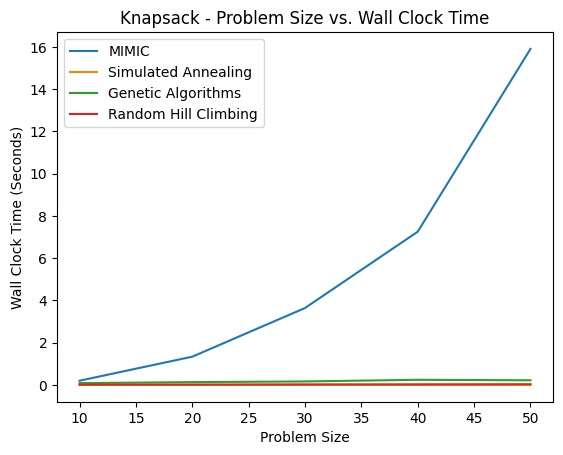

In [96]:
mimic_scores, sa_scores, ga_scores, rhc_scores = np.array(mimic_scores), np.array(sa_scores), np.array(ga_scores), np.array(rhc_scores)
plt.plot(problem_sizes, mimic_times, label='MIMIC')
plt.plot(problem_sizes, sa_times, label="Simulated Annealing")
plt.plot(problem_sizes, ga_times, label="Genetic Algorithms")
plt.plot(problem_sizes, rhc_times, label="Random Hill Climbing")
plt.xlabel("Problem Size")
plt.ylabel("Wall Clock Time (Seconds)")
plt.legend()
plt.title("Knapsack - Problem Size vs. Wall Clock Time")
plt.savefig("Knapsack_Size_Time.png")

## TSP

In [197]:
from mlrose_hiive import TravellingSales
class TSP_Revised(TravellingSales):
    def __init__(self, coords=None, distances=None):
        TravellingSales.__init__(self, coords=coords, distances=distances)
        
    def evaluate(self,state):
        fitness = TravellingSales.evaluate(self, state)
        return -1 * fitness
    
def get_coord():
    return np.random.uniform(-10, 10)

def generate_tsp_prob(num_cities):
    
    coords = [(get_coord(), get_coord()) for _ in range(num_cities)]
    fitness = TSP_Revised(coords=coords)
    problem = mlrose_hiive.TSPOpt(length=num_cities, fitness_fn=fitness, maximize=True)
    
    return problem

In [221]:
#tune each algorithm

problem = generate_tsp_prob(30)

keep_pct_list=[.1, .15, .2, .25, .3]
pop_size_list=[100, 150, 200]
decay_rates = [.9, .95, .99, .999]
mutation_probs = [.1, .15, .2, .25, .3]
restart_list = [5, 20, 50]

mimic_fit = tune_mimic(problem, keep_pct_list, pop_size_list)
sa_fit = tune_sa(problem, decay_rates)
ga_fit = tune_ga(problem, pop_size_list, mutation_probs)
rhc_fit = tune_rhc(problem, restart_list)


In [223]:

problem_sizes = [10, 20, 30, 40, 50]


random_seeds = np.arange(0, 5).tolist()

mimic_scores = []
sa_scores = []
ga_scores = []
rhc_scores = []

for p in problem_sizes:
    
    problem = generate_tsp_prob(p)
    
    mimic_seed_scores = []
    sa_seed_scores = []
    ga_seed_scores = []
    rhc_seed_scores = []
    
    for r in random_seeds:
    
        
    
    
        _, fitness, _ = mlrose_hiive.mimic(problem, keep_pct=mimic_fit['keep_pct'], pop_size = mimic_fit['pop_size'])
        mimic_seed_scores.append(fitness)
        _, fitness, _ = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(init_temp=1.0, decay=sa_fit['decay_rate'], min_temp=.001))
        sa_seed_scores.append(fitness)
        _, fitness, _ = mlrose_hiive.genetic_alg(problem, pop_size=ga_fit['pop_size'], mutation_prob=ga_fit['mutation_prob'])
        ga_seed_scores.append(fitness)
        _, fitness, _ = mlrose_hiive.random_hill_climb(problem, restarts=rhc_fit['restarts'])
        rhc_seed_scores.append(fitness)
    mimic_scores.append(mimic_seed_scores)
    sa_scores.append(sa_seed_scores)
    ga_scores.append(ga_seed_scores)
    rhc_scores.append(rhc_seed_scores)

In [224]:
mimic_scores, sa_scores, ga_scores, rhc_scores = np.array(mimic_scores), np.array(sa_scores), np.array(ga_scores), np.array(rhc_scores)

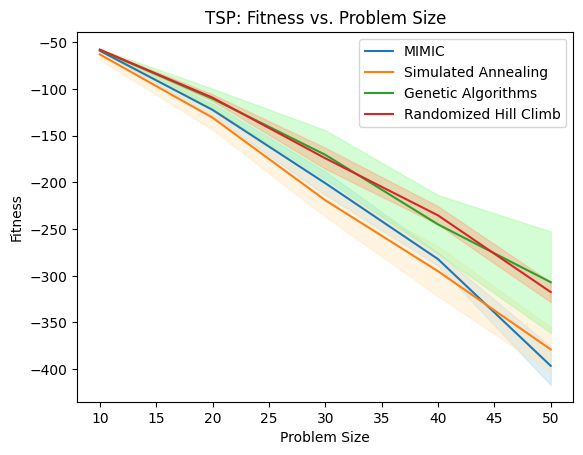

In [239]:
plt.plot(problem_sizes, np.mean(mimic_scores, axis=1), label="MIMIC")
plt.fill_between(problem_sizes, np.mean(mimic_scores, axis=1) + np.std(mimic_scores, axis=1), np.mean(mimic_scores, axis=1) - np.std(mimic_scores, axis=1), color='lightblue', alpha=.4)
plt.plot(problem_sizes, np.mean(sa_scores, axis=1), label="Simulated Annealing")
plt.fill_between(problem_sizes, np.mean(sa_scores, axis=1) + np.std(sa_scores, axis=1), np.mean(sa_scores, axis=1) - np.std(sa_scores, axis=1), color='moccasin', alpha=.4)

plt.plot(problem_sizes, np.mean(ga_scores, axis=1), label ="Genetic Algorithms")
plt.fill_between(problem_sizes, np.mean(ga_scores, axis=1) + np.std(ga_scores, axis=1), np.mean(ga_scores, axis=1) - np.std(ga_scores, axis=1), color='palegreen', alpha=.4)

plt.plot(problem_sizes, np.mean(rhc_scores, axis=1), label="Randomized Hill Climb")
plt.fill_between(problem_sizes, np.mean(rhc_scores, axis=1) + np.std(rhc_scores, axis=1), np.mean(rhc_scores, axis=1) - np.std(rhc_scores, axis=1), color='lightsalmon', alpha=.4)

plt.title("TSP: Fitness vs. Problem Size")
plt.xlabel("Problem Size")
plt.ylabel("Fitness")
plt.legend()
plt.savefig("tsp_problem_size.png")

In [10]:
# fitness vs. fevals

problem = generate_tsp_prob(40)
mimic_curves = []
sa_curves = []
ga_curves = []
rhc_curves = []

random_seeds = np.arange(0, 5).tolist()
for r in random_seeds: 

    _, _, mimic_curve = mlrose_hiive.mimic(problem, keep_pct=mimic_fit['keep_pct'], pop_size=mimic_fit['pop_size'], random_state=r, curve=True)
    _, _, sa_curve = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(init_temp=1.0, decay=sa_fit['decay_rate'], min_temp=.001), random_state=r, curve=True)
    _, _, ga_curve = mlrose_hiive.genetic_alg(problem, pop_size=ga_fit['pop_size'], mutation_prob=ga_fit['mutation_prob'], random_state=r, curve=True)
    _, _, rhc_curve = mlrose_hiive.random_hill_climb(problem, restarts=rhc_fit['restarts'], random_state=r, curve=True)
    
    mimic_curves.append(mimic_curve)
    sa_curves.append(sa_curve)
    ga_curves.append(ga_curve)
    rhc_curves.append(rhc_curve)


#mimic_curves, sa_curves, ga_curves, rhc_curves = np.stack(mimic_curves), np.stack(sa_curves), np.stack(ga_curves), np.stack(rhc_curves)

In [13]:
mimic_curves = pad_sequences(mimic_curves, dtype="float64", padding="post", value=np.nan)
sa_curves = pad_sequences(sa_curves, dtype="float64", padding="post", value=np.nan)
ga_curves = pad_sequences(ga_curves, dtype="float64", padding="post", value=np.nan)
rhc_curves = pad_sequences(rhc_curves, dtype="float64", padding="post", value=np.nan)

In [22]:
mimic_stats = np.array([np.nanmean(mimic_curves[:, :, 0], axis=0), np.nanstd(mimic_curves[:,:,0], axis=0)])
sa_stats = np.array([np.nanmean(sa_curves[:,:,0], axis=0), np.nanstd(sa_curves[:,:,0], axis=0)])
ga_stats = np.array([np.nanmean(ga_curves[:,:,0], axis=0), np.nanstd(ga_curves[:,:,0], axis=0)])
rhc_stats = np.array([np.nanmean(rhc_curves[:,:,0], axis=0), np.nanstd(rhc_curves[:,:,0], axis=0)])

In [23]:
mimic_stats

array([[-343.42212469, -338.2711209 , -329.15256612, -322.82558633,
        -320.1035401 , -314.62320996, -314.62320996, -307.13868908,
        -303.31671258, -298.57542677, -297.22786503, -295.07516596,
        -293.72395796, -290.65111263, -290.65111263, -290.56920637,
        -278.78904709, -276.92948254, -276.55626328, -276.55626328,
        -264.05938066, -250.90383345, -250.90383345, -250.90383345,
        -250.90383345, -250.90383345, -253.52084686, -253.52084686,
        -253.52084686],
       [   6.41677134,    4.07392094,    9.72065495,    9.06859821,
          10.17267362,   12.8183383 ,   12.8183383 ,   17.03165171,
          20.77881506,   23.43662341,   24.70680066,   27.19567814,
          28.38879902,   31.62252396,   31.62252396,   31.73142875,
          25.36992313,   26.73511912,   27.04705601,   27.04705601,
          18.72705754,    2.6170134 ,    2.6170134 ,    2.6170134 ,
           2.6170134 ,    2.6170134 ,    0.        ,    0.        ,
           0.        ]])

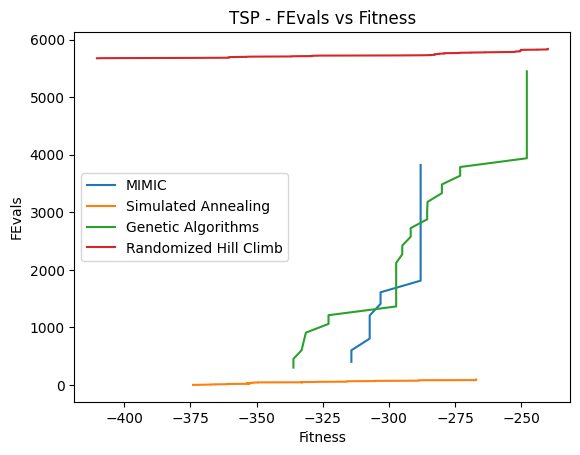

In [260]:
plt.plot(mimic_curve[:, 0], mimic_curve[:, 1], label="MIMIC")
plt.plot(sa_curve[:, 0], sa_curve[:, 1], label="Simulated Annealing")
plt.plot(ga_curve[:, 0], ga_curve[:, 1], label="Genetic Algorithms")
plt.plot(rhc_curve[:, 0], rhc_curve[:, 1], label="Randomized Hill Climb")
plt.xlabel("Fitness")
plt.ylabel("FEvals")
plt.legend()
plt.title("TSP - FEvals vs Fitness")
plt.savefig("TSP_FEvals_Fit.png")

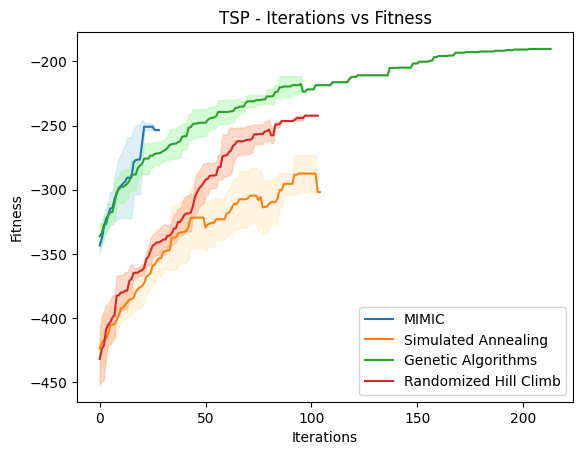

In [32]:
plt.plot(list(range(len(mimic_stats[0, :]))), mimic_stats[0, :], label="MIMIC")
plt.fill_between(list(range(len(mimic_stats[0, :]))), mimic_stats[0,:] + mimic_stats[1,:], mimic_stats[0,:] - mimic_stats[1,:], color='lightblue', alpha=.4)
plt.plot(list(range(len(sa_stats[0, :]))), sa_stats[0, :], label="Simulated Annealing")
plt.fill_between(list(range(len(sa_stats[0, :]))), sa_stats[0,:] + sa_stats[1,:], sa_stats[0,:] - sa_stats[1,:], color='moccasin', alpha=.4)

plt.plot(list(range(len(ga_stats[0, :]))), ga_stats[0, :], label="Genetic Algorithms")
plt.fill_between(list(range(len(ga_stats[0, :]))), ga_stats[0,:] + ga_stats[1,:], ga_stats[0,:] - ga_stats[1,:], color='palegreen', alpha=.4)

plt.plot(list(range(len(rhc_stats[0, :]))), rhc_stats[0, :], label="Randomized Hill Climb")
plt.fill_between(list(range(len(rhc_stats[0, :]))), rhc_stats[0,:] + rhc_stats[1,:], rhc_stats[0,:] - rhc_stats[1,:], color='lightsalmon', alpha=.4)

plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend()
plt.title("TSP - Iterations vs Fitness")
plt.savefig("TSP_Iterations_Fit.png")

In [32]:
start = time.time()
best_state, best_fitness, curve = mlrose_hiive.simulated_annealing(problem, curve=True)
end = time.time()
print("Time: ", end - start)
print(best_fitness)

Time:  0.044764041900634766
-19.1952


In [172]:
problem = mlrose_hiive.TSPGenerator().generate(seed=123456, number_of_cities=20)


In [185]:
keep_percents = [.1, .2, .3]
population_sizes = [100, 200]
iteration_list=2 ** np.arange(11)

best_state, best_fitness, curve = mlrose_hiive.mimic(problem, keep_pct=.2, curve=True)
curve

array([[-423.20973186,  402.        ],
       [-407.96233322,  604.        ],
       [-407.96233322,  805.        ],
       [-407.96233322, 1006.        ],
       [-407.96233322, 1207.        ],
       [-406.63652512, 1409.        ],
       [-400.95318033, 1611.        ],
       [-400.95318033, 1812.        ],
       [-394.68019967, 2014.        ],
       [-393.00269411, 2216.        ],
       [-387.7348124 , 2418.        ],
       [-386.69568095, 2620.        ],
       [-386.38952226, 2822.        ],
       [-386.38952226, 3023.        ],
       [-386.38952226, 3224.        ],
       [-386.38952226, 3425.        ],
       [-386.38952226, 3626.        ],
       [-386.38952226, 3827.        ],
       [-386.38952226, 4028.        ],
       [-386.38952226, 4229.        ],
       [-386.38952226, 4430.        ],
       [-386.38952226, 4631.        ],
       [-386.38952226, 4832.        ]])

Text(0.5, 1.0, 'TSP_Mimic')

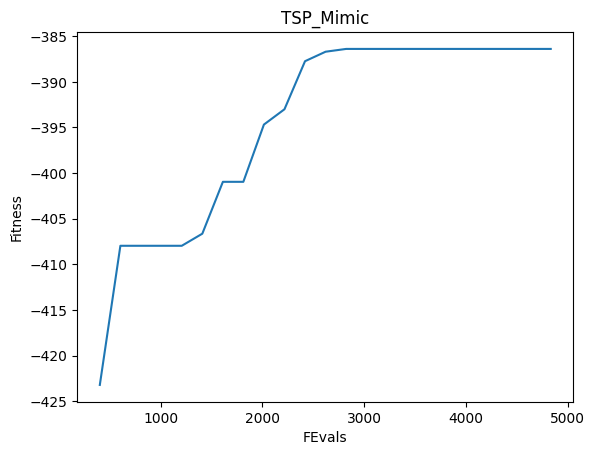

In [190]:
#how to track wall clock time - time to convergence? time over iterations?

In [262]:
problem_sizes = [10, 20, 30, 40, 50]
mimic_times = []
sa_times = []
ga_times = []
rhc_times = []

for p in problem_sizes:
    problem = generate_tsp_prob(p)
    
    start = time.time()
    mlrose_hiive.mimic(problem, keep_pct=mimic_fit['keep_pct'], pop_size=mimic_fit['pop_size'], random_state=1, curve=True)
    end = time.time()
    runtime = end - start
    mimic_times.append(runtime)
    
    start = time.time()
    mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(init_temp=1.0, decay=sa_fit['decay_rate'], min_temp=.001), curve=True)
    end = time.time()
    runtime = end - start
    sa_times.append(runtime)
    
    start=time.time()
    mlrose_hiive.genetic_alg(problem, pop_size=ga_fit['pop_size'], mutation_prob=ga_fit['mutation_prob'], curve=True)
    end = time.time()
    runtime = end - start
    ga_times.append(runtime)
    
    start = time.time()
    mlrose_hiive.random_hill_climb(problem, restarts=rhc_fit['restarts'], curve=True)
    end = time.time()
    runtime = end - start
    rhc_times.append(runtime)

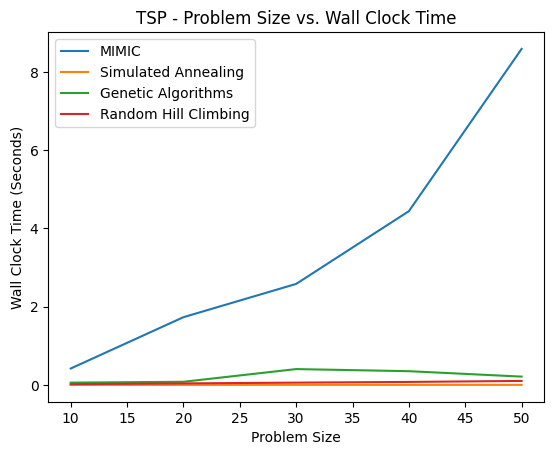

In [270]:
plt.plot(problem_sizes, mimic_times, label='MIMIC')
plt.plot(problem_sizes, sa_times, label="Simulated Annealing")
plt.plot(problem_sizes, ga_times, label="Genetic Algorithms")
plt.plot(problem_sizes, rhc_times, label="Random Hill Climbing")
plt.xlabel("Problem Size")
plt.ylabel("Wall Clock Time (Seconds)")
plt.legend()
plt.title("TSP - Problem Size vs. Wall Clock Time")
plt.savefig("TSP_Size_Time.png")

## Continuous Peaks

In [1]:
from mlrose_hiive.generators import ContinuousPeaksGenerator
problem = ContinuousPeaksGenerator().generate(seed=1, size=30)

In [8]:
#tune each algorithm

keep_pct_list=[.1, .15, .2, .25, .3]
pop_size_list=[100, 150, 200]
decay_rates = [.9, .95, .99, .999]
mutation_probs = [.1, .15, .2, .25, .3]
noise_list = [0.0, 0.025, 0.05]
restart_list = [5, 20, 50]

mimic_fit = tune_mimic(problem, keep_pct_list, pop_size_list, noise_list)
sa_fit = tune_sa(problem, decay_rates)
ga_fit = tune_ga(problem, pop_size_list, mutation_probs)
rhc_fit = tune_rhc(problem, restart_list)


In [24]:

problem_sizes = [10, 20, 30, 40, 50]


random_seeds = np.arange(0, 5).tolist()

mimic_scores = []
sa_scores = []
ga_scores = []
rhc_scores = []

for p in problem_sizes:
    
    problem = ContinuousPeaksGenerator().generate(seed=1, size=p)
    
    mimic_seed_scores = []
    sa_seed_scores = []
    ga_seed_scores = []
    rhc_seed_scores = []
    
    for r in random_seeds:
    
        
    
    
        _, fitness, _ = mlrose_hiive.mimic(problem, max_attempts=25, keep_pct=mimic_fit['keep_pct'], pop_size = mimic_fit['pop_size'])
        mimic_seed_scores.append(fitness)
        _, fitness, _ = mlrose_hiive.simulated_annealing(problem, max_attempts=25, schedule=mlrose_hiive.GeomDecay(init_temp=1.0, decay=sa_fit['decay_rate'], min_temp=.001))
        sa_seed_scores.append(fitness)
        _, fitness, _ = mlrose_hiive.genetic_alg(problem, max_attempts=25, pop_size=ga_fit['pop_size'], mutation_prob=ga_fit['mutation_prob'])
        ga_seed_scores.append(fitness)
        _, fitness, _ = mlrose_hiive.random_hill_climb(problem, max_attempts=25, restarts=rhc_fit['restarts'])
        rhc_seed_scores.append(fitness)
    mimic_scores.append(mimic_seed_scores)
    sa_scores.append(sa_seed_scores)
    ga_scores.append(ga_seed_scores)
    rhc_scores.append(rhc_seed_scores)

In [25]:
mimic_scores, sa_scores, ga_scores, rhc_scores = np.array(mimic_scores), np.array(sa_scores), np.array(ga_scores), np.array(rhc_scores)

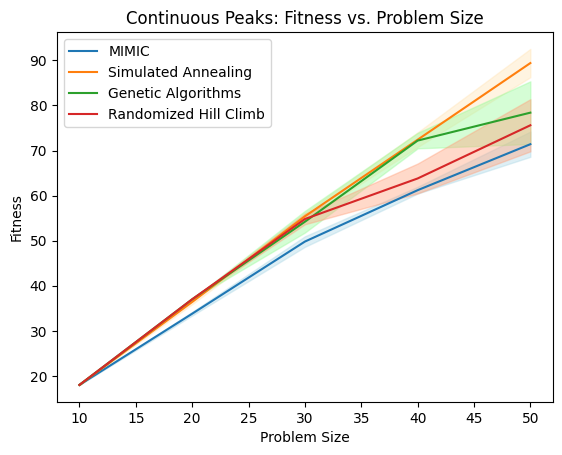

In [27]:
plt.plot(problem_sizes, np.mean(mimic_scores, axis=1), label="MIMIC")
plt.fill_between(problem_sizes, np.mean(mimic_scores, axis=1) + np.std(mimic_scores, axis=1), np.mean(mimic_scores, axis=1) - np.std(mimic_scores, axis=1), color='lightblue', alpha=.4)
plt.plot(problem_sizes, np.mean(sa_scores, axis=1), label="Simulated Annealing")
plt.fill_between(problem_sizes, np.mean(sa_scores, axis=1) + np.std(sa_scores, axis=1), np.mean(sa_scores, axis=1) - np.std(sa_scores, axis=1), color='moccasin', alpha=.4)

plt.plot(problem_sizes, np.mean(ga_scores, axis=1), label ="Genetic Algorithms")
plt.fill_between(problem_sizes, np.mean(ga_scores, axis=1) + np.std(ga_scores, axis=1), np.mean(ga_scores, axis=1) - np.std(ga_scores, axis=1), color='palegreen', alpha=.4)

plt.plot(problem_sizes, np.mean(rhc_scores, axis=1), label="Randomized Hill Climb")
plt.fill_between(problem_sizes, np.mean(rhc_scores, axis=1) + np.std(rhc_scores, axis=1), np.mean(rhc_scores, axis=1) - np.std(rhc_scores, axis=1), color='lightsalmon', alpha=.4)

plt.title("Continuous Peaks: Fitness vs. Problem Size")
plt.xlabel("Problem Size")
plt.ylabel("Fitness")
plt.legend()
plt.savefig("peaks_problem_size.png")

In [36]:
# fitness vs. fevals

problem = ContinuousPeaksGenerator().generate(seed=1, size=40)
mimic_curves = []
sa_curves = []
ga_curves = []
rhc_curves = []

random_seeds = np.arange(0, 5).tolist()
for r in random_seeds: 

    _, _, mimic_curve = mlrose_hiive.mimic(problem, max_attempts=25, keep_pct=mimic_fit['keep_pct'], pop_size=mimic_fit['pop_size'], random_state=r, curve=True)
    _, _, sa_curve = mlrose_hiive.simulated_annealing(problem, max_attempts=25, schedule=mlrose_hiive.GeomDecay(init_temp=1.0, decay=sa_fit['decay_rate'], min_temp=.001), random_state=r, curve=True)
    _, _, ga_curve = mlrose_hiive.genetic_alg(problem, max_attempts=25, pop_size=ga_fit['pop_size'], mutation_prob=ga_fit['mutation_prob'], random_state=r, curve=True)
    _, _, rhc_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=25, restarts=rhc_fit['restarts'], random_state=r, curve=True)
    
    mimic_curves.append(mimic_curve)
    sa_curves.append(sa_curve)
    ga_curves.append(ga_curve)
    rhc_curves.append(rhc_curve)


#mimic_curves, sa_curves, ga_curves, rhc_curves = np.stack(mimic_curves), np.stack(sa_curves), np.stack(ga_curves), np.stack(rhc_curves)

In [30]:
mimic_curves = pad_sequences(mimic_curves, dtype="float64", padding="post", value=np.nan)
sa_curves = pad_sequences(sa_curves, dtype="float64", padding="post", value=np.nan)
ga_curves = pad_sequences(ga_curves, dtype="float64", padding="post", value=np.nan)
rhc_curves = pad_sequences(rhc_curves, dtype="float64", padding="post", value=np.nan)

mimic_stats = np.array([np.nanmean(mimic_curves[:, :, 0], axis=0), np.nanstd(mimic_curves[:,:,0], axis=0)])
sa_stats = np.array([np.nanmean(sa_curves[:,:,0], axis=0), np.nanstd(sa_curves[:,:,0], axis=0)])
ga_stats = np.array([np.nanmean(ga_curves[:,:,0], axis=0), np.nanstd(ga_curves[:,:,0], axis=0)])
rhc_stats = np.array([np.nanmean(rhc_curves[:,:,0], axis=0), np.nanstd(rhc_curves[:,:,0], axis=0)])

Text(0.5, 1.0, 'Continuous Peaks - Iterations vs FEvals')

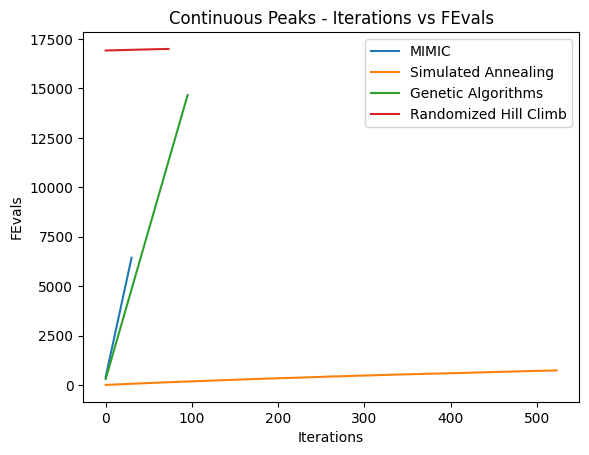

In [41]:
plt.plot(range(len(mimic_curve[:,1])), mimic_curve[:, 1], label="MIMIC")
plt.plot(range(len(sa_curve[:,1])), sa_curve[:, 1], label="Simulated Annealing")
plt.plot(range(len(ga_curve[:,1])), ga_curve[:, 1], label="Genetic Algorithms")
plt.plot(range(len(rhc_curve[:,1])), rhc_curve[:, 1], label="Randomized Hill Climb")
plt.xlabel("Iterations")
plt.ylabel("FEvals")
plt.legend()
plt.title("Continuous Peaks - Iterations vs FEvals")
#plt.savefig("Peaks_FEvals_Fit.png")

In [48]:
14663/96

152.73958333333334

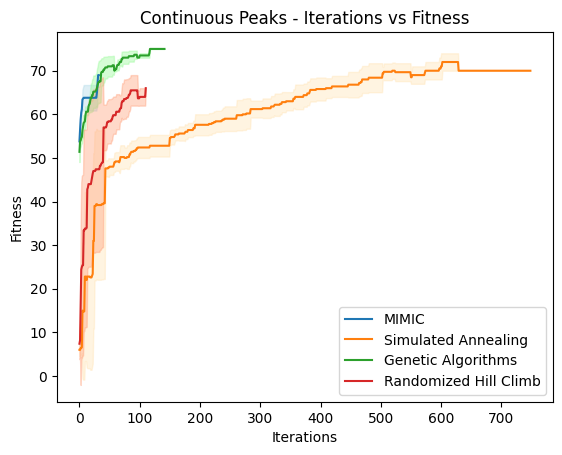

In [33]:
plt.plot(list(range(len(mimic_stats[0, :]))), mimic_stats[0, :], label="MIMIC")
plt.fill_between(list(range(len(mimic_stats[0, :]))), mimic_stats[0,:] + mimic_stats[1,:], mimic_stats[0,:] - mimic_stats[1,:], color='lightblue', alpha=.4)
plt.plot(list(range(len(sa_stats[0, :]))), sa_stats[0, :], label="Simulated Annealing")
plt.fill_between(list(range(len(sa_stats[0, :]))), sa_stats[0,:] + sa_stats[1,:], sa_stats[0,:] - sa_stats[1,:], color='moccasin', alpha=.4)

plt.plot(list(range(len(ga_stats[0, :]))), ga_stats[0, :], label="Genetic Algorithms")
plt.fill_between(list(range(len(ga_stats[0, :]))), ga_stats[0,:] + ga_stats[1,:], ga_stats[0,:] - ga_stats[1,:], color='palegreen', alpha=.4)

plt.plot(list(range(len(rhc_stats[0, :]))), rhc_stats[0, :], label="Randomized Hill Climb")
plt.fill_between(list(range(len(rhc_stats[0, :]))), rhc_stats[0,:] + rhc_stats[1,:], rhc_stats[0,:] - rhc_stats[1,:], color='lightsalmon', alpha=.4)

plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend()
plt.title("Continuous Peaks - Iterations vs Fitness")
plt.savefig("Peaks_Iterations_Fit.png")

In [34]:
problem_sizes = [10, 20, 30, 40, 50]
mimic_times = []
sa_times = []
ga_times = []
rhc_times = []

for p in problem_sizes:
    problem = ContinuousPeaksGenerator().generate(seed=1, size=p)
    
    start = time.time()
    mlrose_hiive.mimic(problem, max_attempts=25, keep_pct=mimic_fit['keep_pct'], pop_size=mimic_fit['pop_size'], random_state=1, curve=True)
    end = time.time()
    runtime = end - start
    mimic_times.append(runtime)
    
    start = time.time()
    mlrose_hiive.simulated_annealing(problem, max_attempts=25, schedule=mlrose_hiive.GeomDecay(init_temp=1.0, decay=sa_fit['decay_rate'], min_temp=.001), curve=True)
    end = time.time()
    runtime = end - start
    sa_times.append(runtime)
    
    start=time.time()
    mlrose_hiive.genetic_alg(problem, max_attempts=25, pop_size=ga_fit['pop_size'], mutation_prob=ga_fit['mutation_prob'], curve=True)
    end = time.time()
    runtime = end - start
    ga_times.append(runtime)
    
    start = time.time()
    mlrose_hiive.random_hill_climb(problem, max_attempts=25, restarts=rhc_fit['restarts'], curve=True)
    end = time.time()
    runtime = end - start
    rhc_times.append(runtime)

Text(0.5, 1.0, 'Continuous Peaks - Problem Size vs. Wall Clock Time')

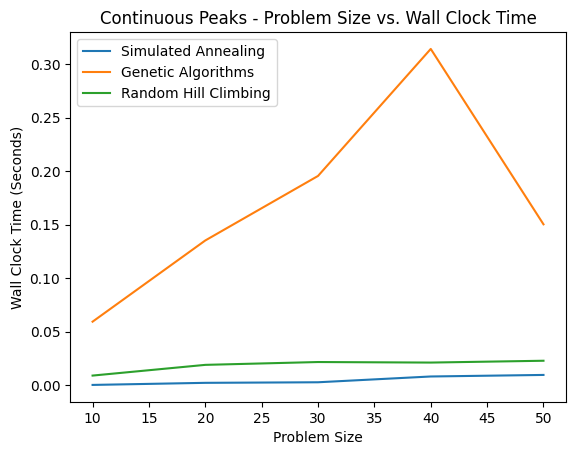

In [52]:
mimic_scores, sa_scores, ga_scores, rhc_scores = np.array(mimic_scores), np.array(sa_scores), np.array(ga_scores), np.array(rhc_scores)
#plt.plot(problem_sizes, mimic_times, label='MIMIC')
plt.plot(problem_sizes, sa_times, label="Simulated Annealing")
plt.plot(problem_sizes, ga_times, label="Genetic Algorithms")
plt.plot(problem_sizes, rhc_times, label="Random Hill Climbing")
plt.xlabel("Problem Size")
plt.ylabel("Wall Clock Time (Seconds)")
plt.legend()
plt.title("Continuous Peaks - Problem Size vs. Wall Clock Time")
#plt.savefig("Peaks_Size_Time.png")

## Flip Flops

In [97]:
from mlrose_hiive.generators import FlipFlopGenerator
problem = FlipFlopGenerator().generate(seed=1, size=30)

In [101]:
#tune each algorithm

keep_pct_list=[.1, .15, .2, .25, .3]
pop_size_list=[100, 150, 200]
decay_rates = [.9, .95, .99, .999]
mutation_probs = [.1, .15, .2, .25, .3]
restart_list = [5, 20, 50]
noise_list = [0.0, .025, 0.05]

mimic_fit = tune_mimic(problem, keep_pct_list, pop_size_list, noise_list)
sa_fit = tune_sa(problem, decay_rates)
ga_fit = tune_ga(problem, pop_size_list, mutation_probs)
rhc_fit = tune_rhc(problem, restart_list)


In [103]:

problem_sizes = [10, 20, 30, 40, 50]


random_seeds = np.arange(0, 5).tolist()

mimic_scores = []
sa_scores = []
ga_scores = []
rhc_scores = []

for p in problem_sizes:
    
    problem = FlipFlopGenerator().generate(seed=1, size=p)
    
    mimic_seed_scores = []
    sa_seed_scores = []
    ga_seed_scores = []
    rhc_seed_scores = []
    
    for r in random_seeds:
    
        
    
    
        _, fitness, _ = mlrose_hiive.mimic(problem, keep_pct=mimic_fit['keep_pct'], pop_size = mimic_fit['pop_size'], noise = mimic_fit['noise'])
        mimic_seed_scores.append(fitness)
        _, fitness, _ = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(init_temp=1.0, decay=sa_fit['decay_rate'], min_temp=.001))
        sa_seed_scores.append(fitness)
        _, fitness, _ = mlrose_hiive.genetic_alg(problem, pop_size=ga_fit['pop_size'], mutation_prob=ga_fit['mutation_prob'])
        ga_seed_scores.append(fitness)
        _, fitness, _ = mlrose_hiive.random_hill_climb(problem, restarts=rhc_fit['restarts'])
        rhc_seed_scores.append(fitness)
    mimic_scores.append(mimic_seed_scores)
    sa_scores.append(sa_seed_scores)
    ga_scores.append(ga_seed_scores)
    rhc_scores.append(rhc_seed_scores)

In [104]:
mimic_scores, sa_scores, ga_scores, rhc_scores = np.array(mimic_scores), np.array(sa_scores), np.array(ga_scores), np.array(rhc_scores)

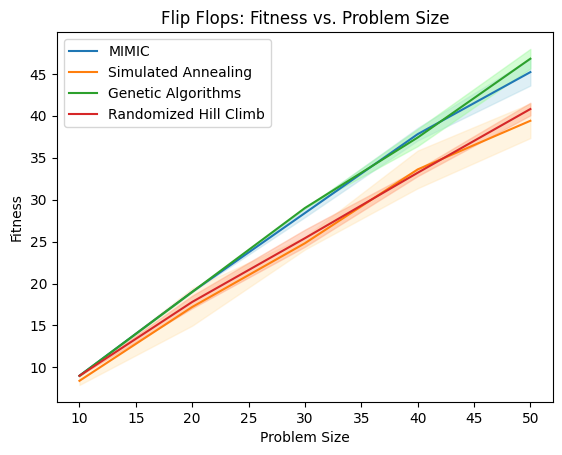

In [106]:
plt.plot(problem_sizes, np.mean(mimic_scores, axis=1), label="MIMIC")
plt.fill_between(problem_sizes, np.mean(mimic_scores, axis=1) + np.std(mimic_scores, axis=1), np.mean(mimic_scores, axis=1) - np.std(mimic_scores, axis=1), color='lightblue', alpha=.4)
plt.plot(problem_sizes, np.mean(sa_scores, axis=1), label="Simulated Annealing")
plt.fill_between(problem_sizes, np.mean(sa_scores, axis=1) + np.std(sa_scores, axis=1), np.mean(sa_scores, axis=1) - np.std(sa_scores, axis=1), color='moccasin', alpha=.4)

plt.plot(problem_sizes, np.mean(ga_scores, axis=1), label ="Genetic Algorithms")
plt.fill_between(problem_sizes, np.mean(ga_scores, axis=1) + np.std(ga_scores, axis=1), np.mean(ga_scores, axis=1) - np.std(ga_scores, axis=1), color='palegreen', alpha=.4)

plt.plot(problem_sizes, np.mean(rhc_scores, axis=1), label="Randomized Hill Climb")
plt.fill_between(problem_sizes, np.mean(rhc_scores, axis=1) + np.std(rhc_scores, axis=1), np.mean(rhc_scores, axis=1) - np.std(rhc_scores, axis=1), color='lightsalmon', alpha=.4)

plt.title("Flip Flops: Fitness vs. Problem Size")
plt.xlabel("Problem Size")
plt.ylabel("Fitness")
plt.legend()
plt.savefig("flop_problem_size.png")

In [108]:
# fitness vs. fevals

problem = FlipFlopGenerator().generate(seed=1, size=40)
mimic_curves = []
sa_curves = []
ga_curves = []
rhc_curves = []

random_seeds = np.arange(0, 5).tolist()
for r in random_seeds: 

    _, _, mimic_curve = mlrose_hiive.mimic(problem, keep_pct=mimic_fit['keep_pct'], pop_size=mimic_fit['pop_size'], noise=mimic_fit['noise'], random_state=r, curve=True)
    _, _, sa_curve = mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(init_temp=1.0, decay=sa_fit['decay_rate'], min_temp=.001), random_state=r, curve=True)
    _, _, ga_curve = mlrose_hiive.genetic_alg(problem, pop_size=ga_fit['pop_size'], mutation_prob=ga_fit['mutation_prob'], random_state=r, curve=True)
    _, _, rhc_curve = mlrose_hiive.random_hill_climb(problem, restarts=rhc_fit['restarts'], random_state=r, curve=True)
    
    mimic_curves.append(mimic_curve)
    sa_curves.append(sa_curve)
    ga_curves.append(ga_curve)
    rhc_curves.append(rhc_curve)


#mimic_curves, sa_curves, ga_curves, rhc_curves = np.stack(mimic_curves), np.stack(sa_curves), np.stack(ga_curves), np.stack(rhc_curves)

In [ ]:
mimic_curves = pad_sequences(mimic_curves, dtype="float64", padding="post", value=np.nan)
sa_curves = pad_sequences(sa_curves, dtype="float64", padding="post", value=np.nan)
ga_curves = pad_sequences(ga_curves, dtype="float64", padding="post", value=np.nan)
rhc_curves = pad_sequences(rhc_curves, dtype="float64", padding="post", value=np.nan)

mimic_stats = np.array([np.nanmean(mimic_curves[:, :, 0], axis=0), np.nanstd(mimic_curves[:,:,0], axis=0)])
sa_stats = np.array([np.nanmean(sa_curves[:,:,0], axis=0), np.nanstd(sa_curves[:,:,0], axis=0)])
ga_stats = np.array([np.nanmean(ga_curves[:,:,0], axis=0), np.nanstd(ga_curves[:,:,0], axis=0)])
rhc_stats = np.array([np.nanmean(rhc_curves[:,:,0], axis=0), np.nanstd(rhc_curves[:,:,0], axis=0)])

In [ ]:
plt.plot(mimic_curve[:, 0], mimic_curve[:, 1], label="MIMIC")
plt.plot(sa_curve[:, 0], sa_curve[:, 1], label="Simulated Annealing")
plt.plot(ga_curve[:, 0], ga_curve[:, 1], label="Genetic Algorithms")
plt.plot(rhc_curve[:, 0], rhc_curve[:, 1], label="Randomized Hill Climb")
plt.xlabel("Fitness")
plt.ylabel("FEvals")
plt.legend()
plt.title("Continuous Peaks - FEvals vs Fitness")
plt.savefig("Peaks_FEvals_Fit.png")

In [ ]:
plt.plot(list(range(len(mimic_stats[0, :]))), mimic_stats[0, :], label="MIMIC")
plt.fill_between(list(range(len(mimic_stats[0, :]))), mimic_stats[0,:] + mimic_stats[1,:], mimic_stats[0,:] - mimic_stats[1,:], color='lightblue', alpha=.4)
plt.plot(list(range(len(sa_stats[0, :]))), sa_stats[0, :], label="Simulated Annealing")
plt.fill_between(list(range(len(sa_stats[0, :]))), sa_stats[0,:] + sa_stats[1,:], sa_stats[0,:] - sa_stats[1,:], color='moccasin', alpha=.4)

plt.plot(list(range(len(ga_stats[0, :]))), ga_stats[0, :], label="Genetic Algorithms")
plt.fill_between(list(range(len(ga_stats[0, :]))), ga_stats[0,:] + ga_stats[1,:], ga_stats[0,:] - ga_stats[1,:], color='palegreen', alpha=.4)

plt.plot(list(range(len(rhc_stats[0, :]))), rhc_stats[0, :], label="Randomized Hill Climb")
plt.fill_between(list(range(len(rhc_stats[0, :]))), rhc_stats[0,:] + rhc_stats[1,:], rhc_stats[0,:] - rhc_stats[1,:], color='lightsalmon', alpha=.4)

plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend()
plt.title("Continuous Peaks - Iterations vs Fitness")
plt.savefig("Peaks_Iterations_Fit.png")

In [ ]:
problem_sizes = [10, 20, 30, 40, 50]
mimic_times = []
sa_times = []
ga_times = []
rhc_times = []

for p in problem_sizes:
    problem = ContinuousPeaksGenerator().generate(seed=1, size=p)
    
    start = time.time()
    mlrose_hiive.mimic(problem, keep_pct=mimic_fit['keep_pct'], pop_size=mimic_fit['pop_size'], random_state=1, curve=True)
    end = time.time()
    runtime = end - start
    mimic_times.append(runtime)
    
    start = time.time()
    mlrose_hiive.simulated_annealing(problem, schedule=mlrose_hiive.GeomDecay(init_temp=1.0, decay=sa_fit['decay_rate'], min_temp=.001), curve=True)
    end = time.time()
    runtime = end - start
    sa_times.append(runtime)
    
    start=time.time()
    mlrose_hiive.genetic_alg(problem, pop_size=ga_fit['pop_size'], mutation_prob=ga_fit['mutation_prob'], curve=True)
    end = time.time()
    runtime = end - start
    ga_times.append(runtime)
    
    start = time.time()
    mlrose_hiive.random_hill_climb(problem, restarts=rhc_fit['restarts'], curve=True)
    end = time.time()
    runtime = end - start
    rhc_times.append(runtime)

In [ ]:
mimic_scores, sa_scores, ga_scores, rhc_scores = np.array(mimic_scores), np.array(sa_scores), np.array(ga_scores), np.array(rhc_scores)
plt.plot(problem_sizes, mimic_times, label='MIMIC')
plt.plot(problem_sizes, sa_times, label="Simulated Annealing")
plt.plot(problem_sizes, ga_times, label="Genetic Algorithms")
plt.plot(problem_sizes, rhc_times, label="Random Hill Climbing")
plt.xlabel("Problem Size")
plt.ylabel("Wall Clock Time (Seconds)")
plt.legend()
plt.title("Continuous Peaks - Problem Size vs. Wall Clock Time")
plt.savefig("Peaks_Size_Time.png")